In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib notebook
import numpy as np
import pandas as pd
from scipy import interpolate
import pickle

import xmeos
from xmeos import models
from xmeos import datamod
from xmeos import eoslib

from collections import OrderedDict
CONSTS = models.CONSTS

In [2]:
eos_mod = eoslib.MgPv_Mosenfelder2009()

In [3]:
Pgrid = np.arange(0,1.01e3,10)
Tfoot_grid = np.arange(1e3,4401,200)
Vad_grid, Tad_grid = eos_mod.adiabatic_path_grid(Tfoot_grid,Pgrid)
props = eos_mod.material_properties(Vad_grid, Tad_grid)

In [4]:

cmap = plt.get_cmap('coolwarm', len(Tfoot_grid))
        
colors = cmap(np.linspace(0,1,len(Tfoot_grid)))

<IPython.core.display.Javascript object>


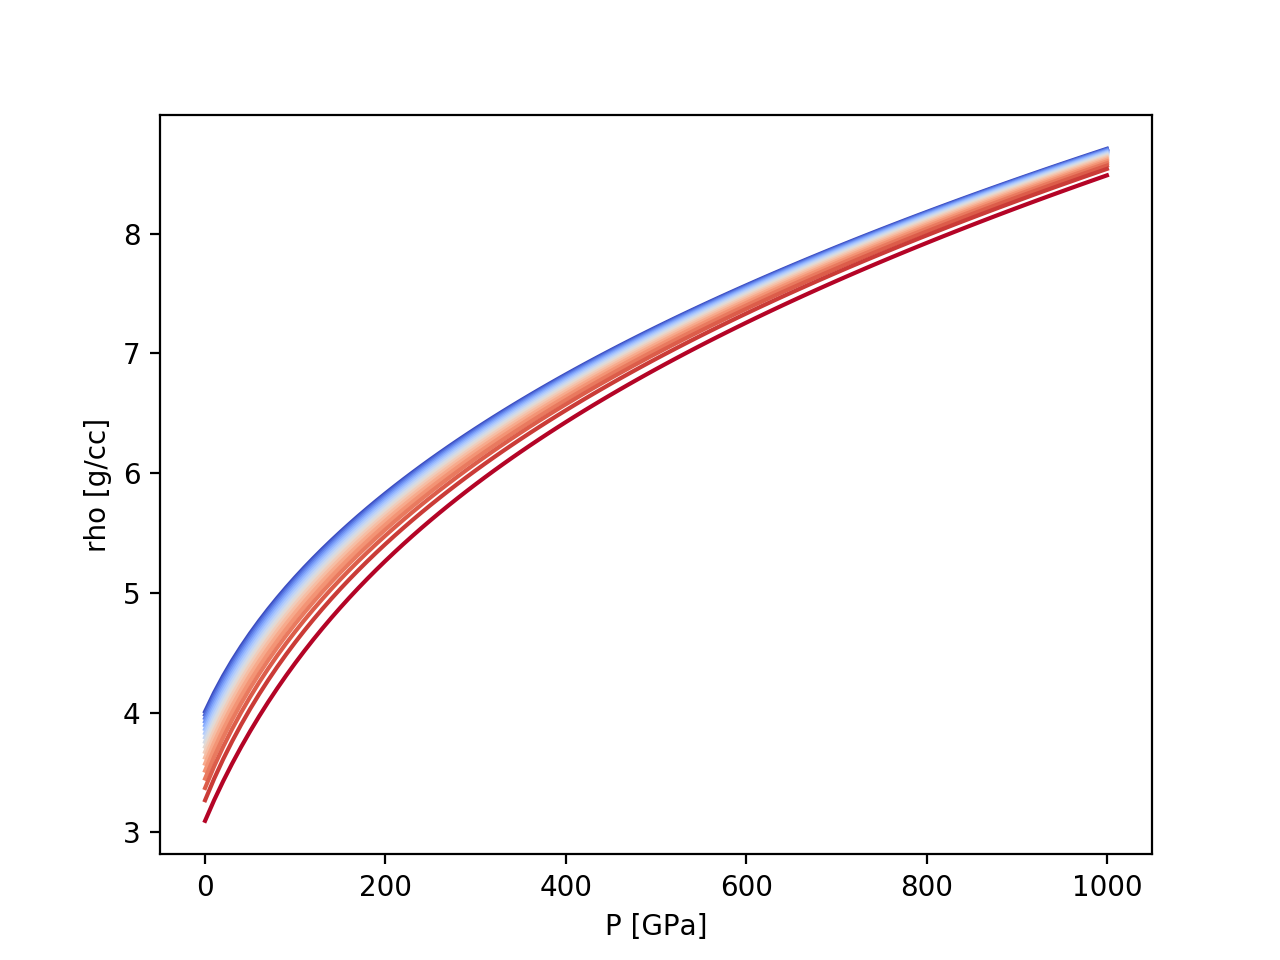

<IPython.core.display.Javascript object>


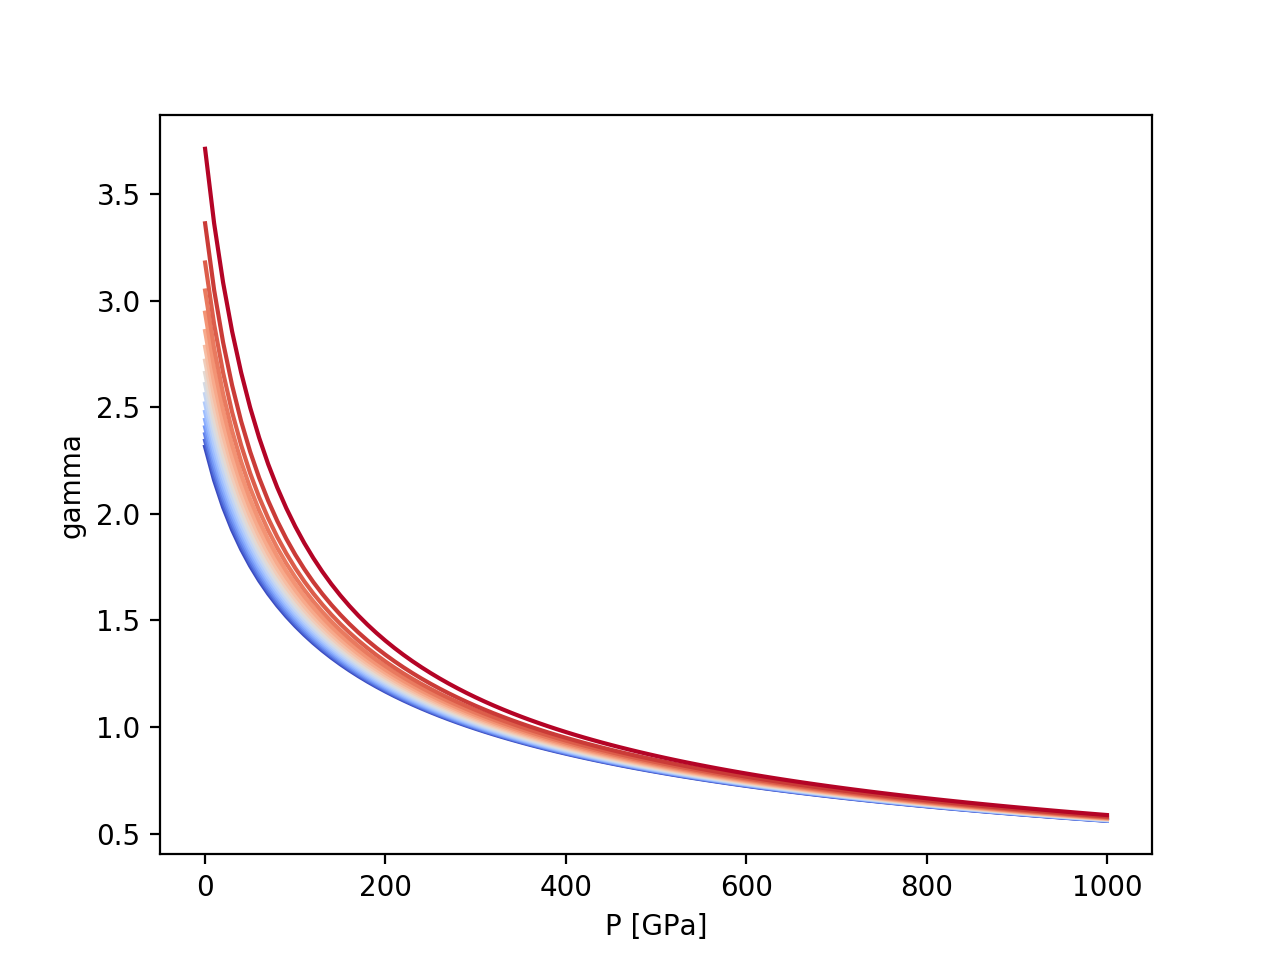

<IPython.core.display.Javascript object>


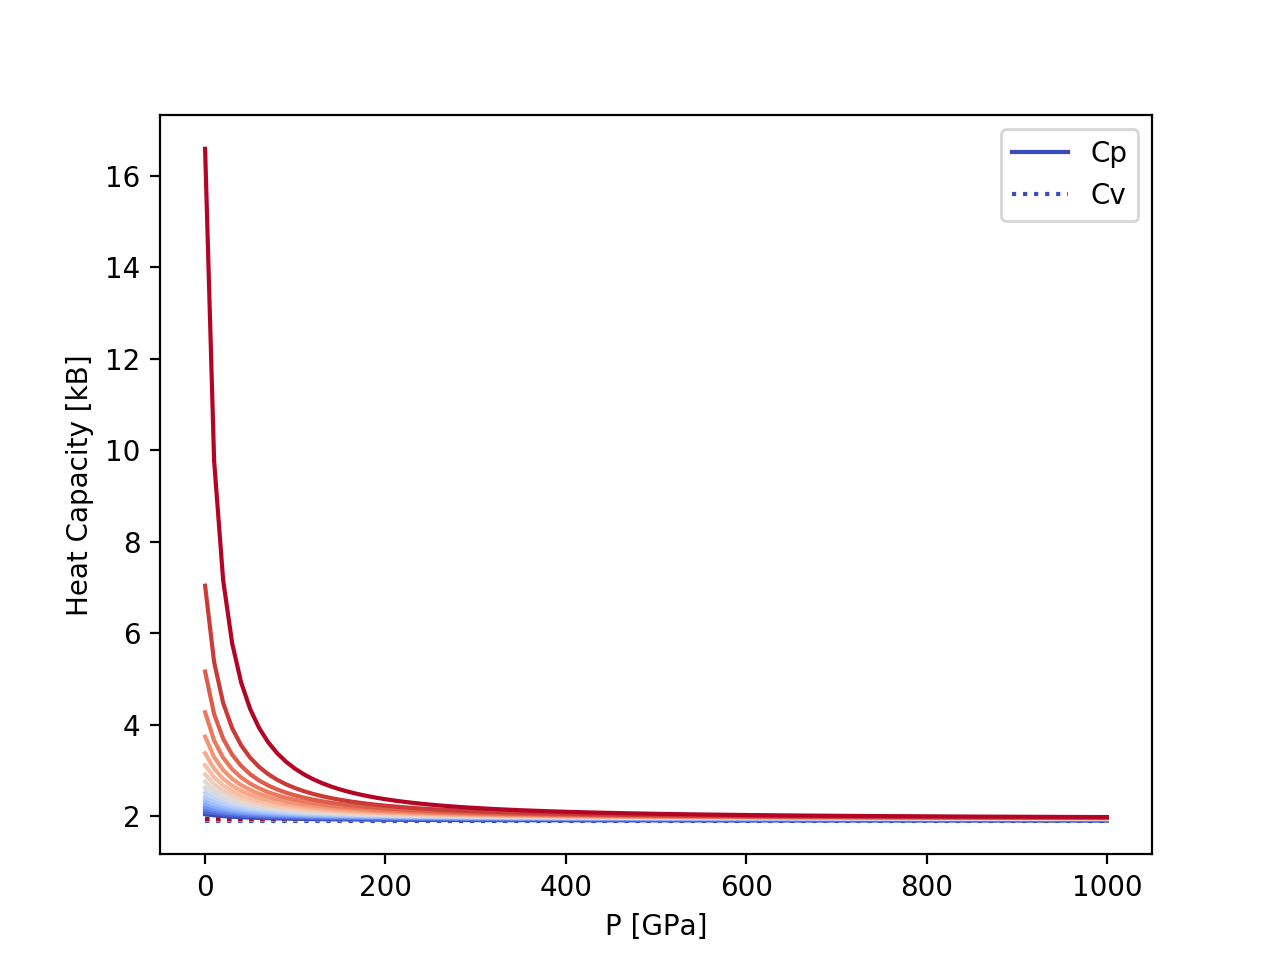

<IPython.core.display.Javascript object>


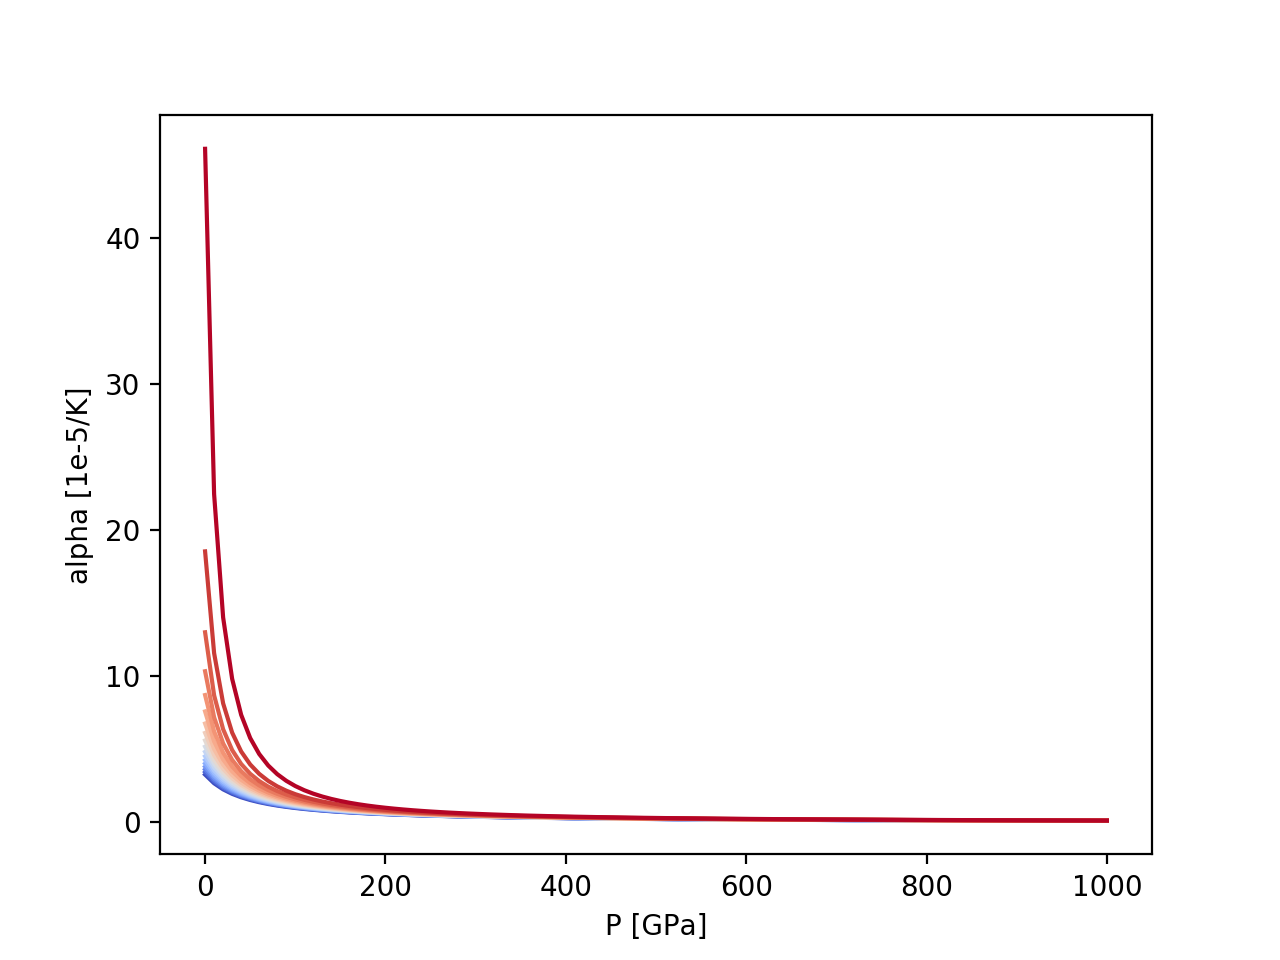

<IPython.core.display.Javascript object>


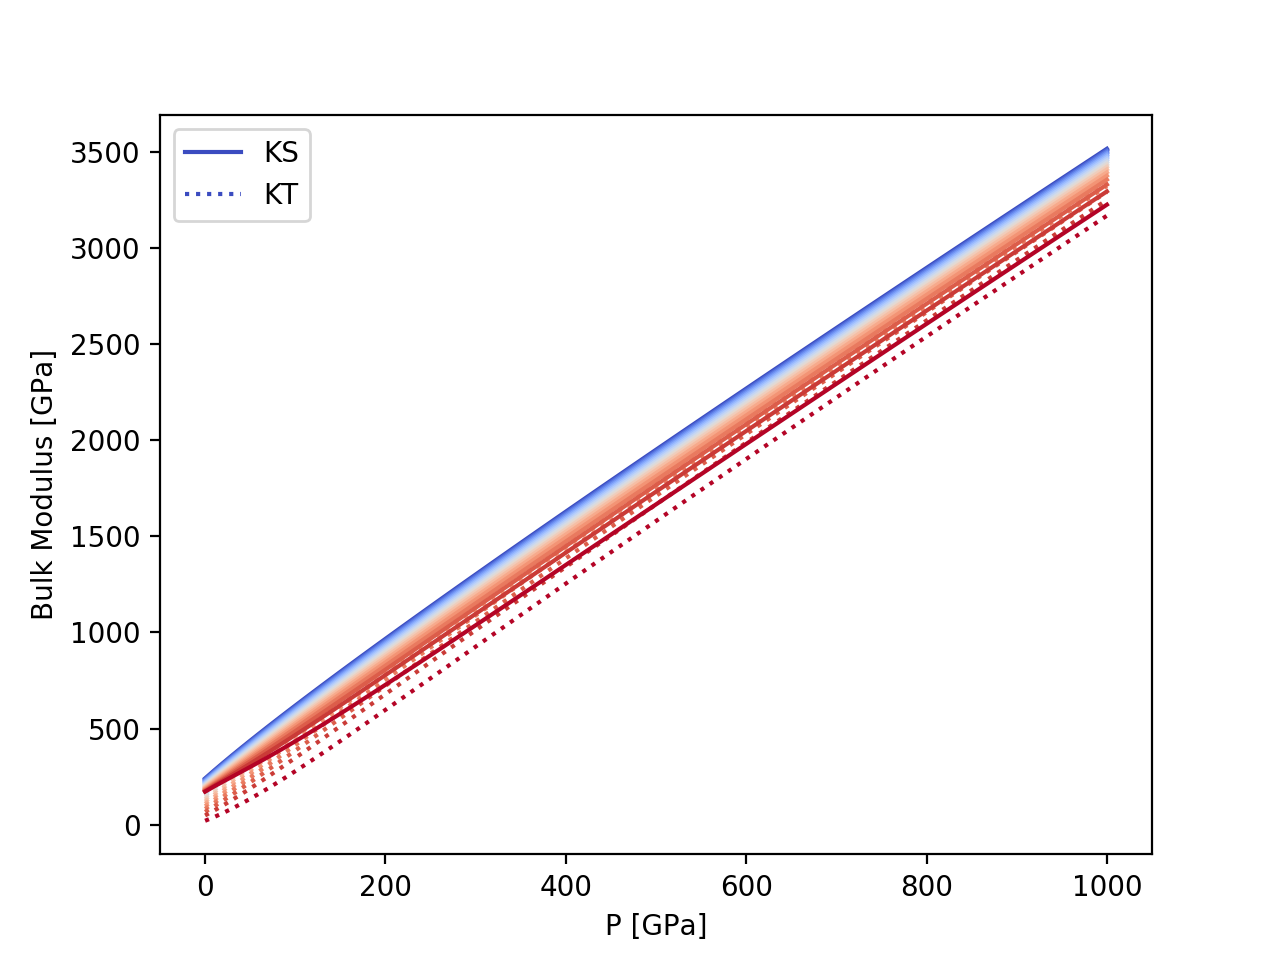

<IPython.core.display.Javascript object>


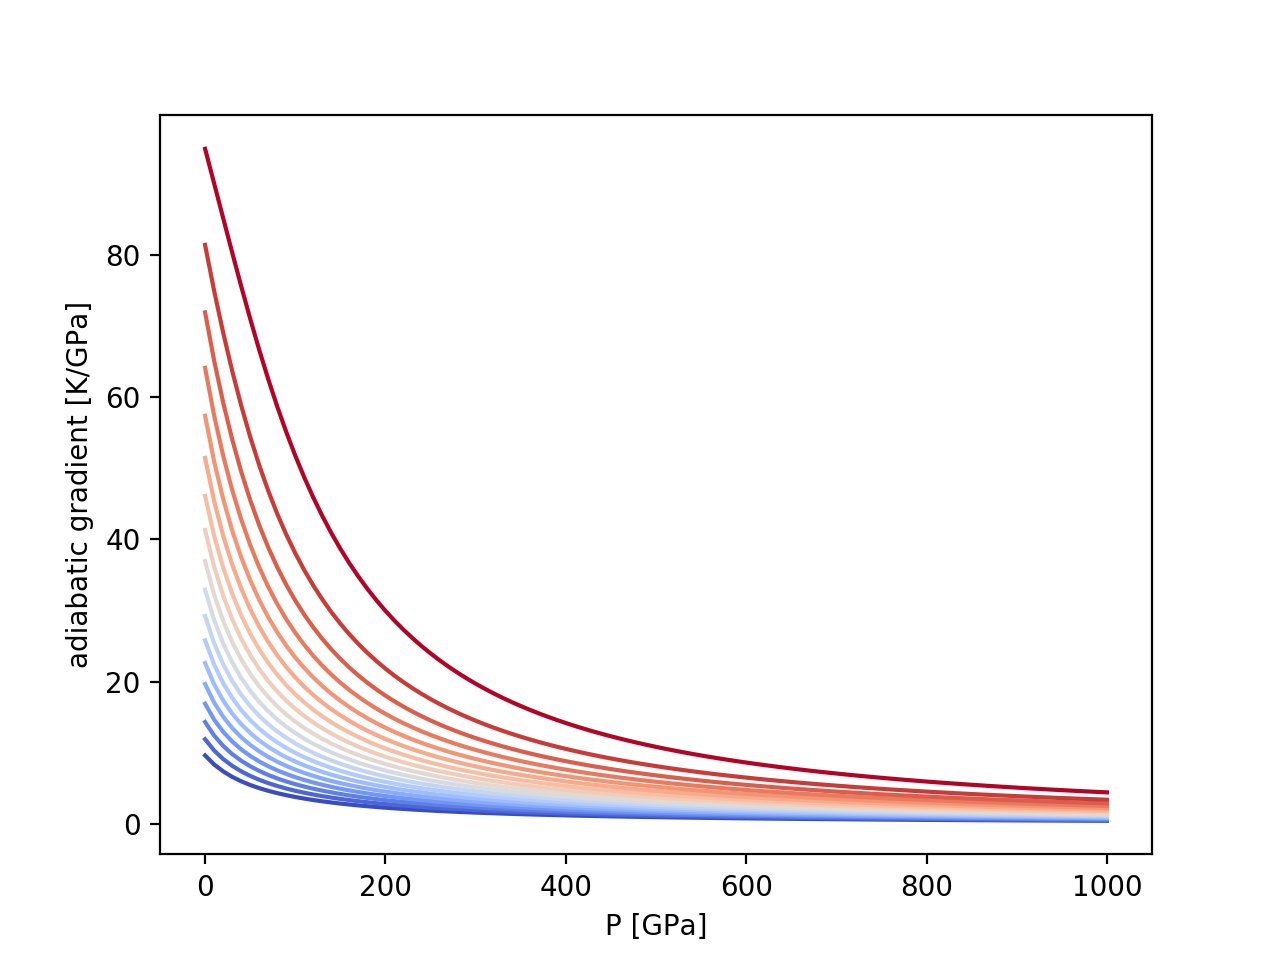

In [5]:
plt.figure()
[plt.plot(iP,irho,color=icol) for iP,irho,icol 
 in zip(props['P'],props['rho'], colors)]
plt.xlabel('P [GPa]')
plt.ylabel('rho [g/cc]')

plt.figure()
[plt.plot(iP,igamma,color=icol) for iP,igamma,icol 
 in zip(props['P'],props['gamma'], colors)]
plt.xlabel('P [GPa]')
plt.ylabel('gamma')

plt.figure()
lines_Cv = [plt.plot(iP,iCv/models.CONSTS['kboltz'],':', label='Cv', 
                     color=icol)[0] for iP,iCv,icol in 
            zip(props['P'], props['C_V'], colors)]
lines_Cp = [plt.plot(iP,iCp/models.CONSTS['kboltz'],'-', label='Cp', 
                     color=icol)[0] for iP,iCp,icol in 
            zip(props['P'], props['C_P'], colors)]

plt.xlabel('P [GPa]')
plt.ylabel('Heat Capacity [kB]')
plt.legend([lines_Cp[0],lines_Cv[0]], ['Cp','Cv'])

plt.figure()
[plt.plot(iP,ialpha*1e5,color=icol) 
 for iP,ialpha,icol in zip(props['P'], props['alpha'], colors)]
plt.xlabel('P [GPa]')
plt.ylabel('alpha [1e-5/K]')


plt.figure()
lines_KT = [plt.plot(iP,iKT,':', color=icol)[0]
 for iP,iKT,icol in zip(props['P'], props['K_T'], colors)]
lines_KS = [plt.plot(iP,iKS,'-', color=icol)[0]
 for iP,iKS,icol in zip(props['P'], props['K_S'], colors)]
plt.xlabel('P [GPa]')
plt.ylabel('Bulk Modulus [GPa]')
plt.legend([lines_KS[0],lines_KT[0]], ['KS','KT'])

plt.figure()
[plt.plot(iP,idTdPs,color=icol) 
 for iP,idTdPs,icol in zip(props['P'], props['dTdP_S'], colors)]
plt.xlabel('P [GPa]')
plt.ylabel('adiabatic gradient [K/GPa]')


<IPython.core.display.Javascript object>


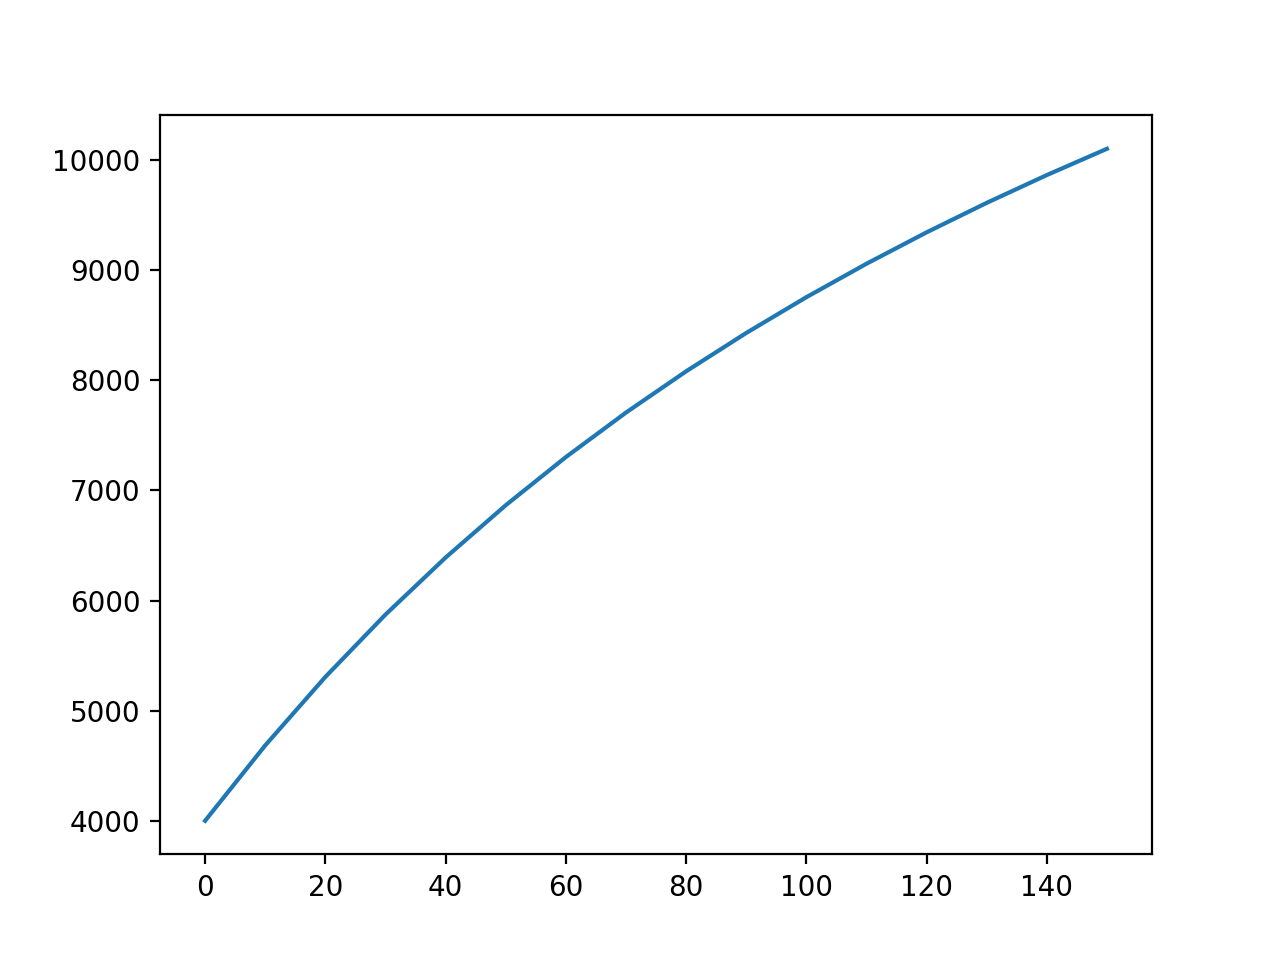

<IPython.core.display.Javascript object>


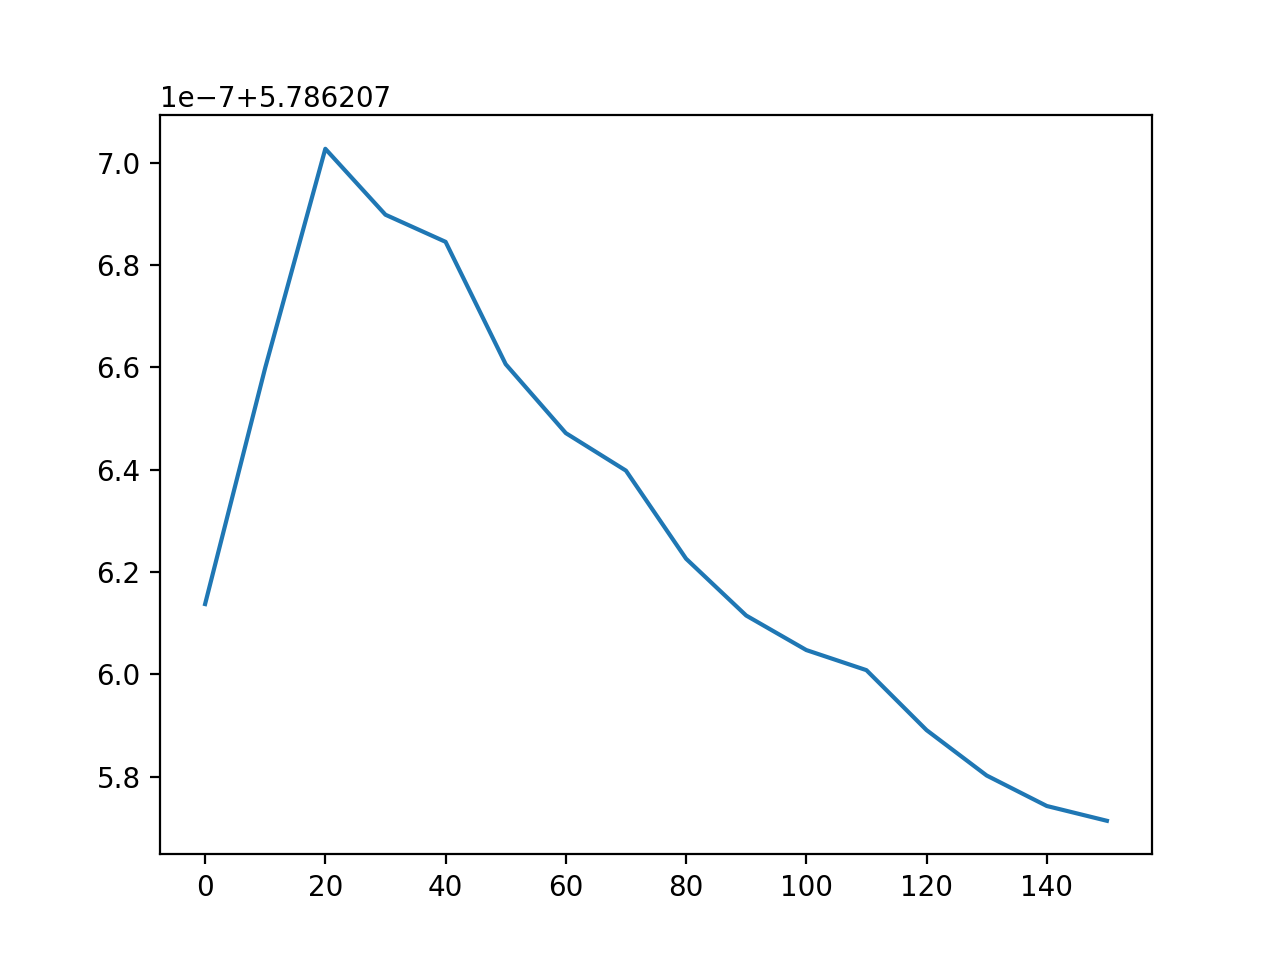

In [6]:
Pgrid = np.arange(0,150.1,10)
Vgrid, Tgrid = eos_mod.adiabatic_path(4000,Pgrid)

Sgrid = eos_mod.entropy(Vgrid, Tgrid)
plt.figure()
plt.plot(Pgrid, Tgrid, '-')

plt.figure()
plt.plot(Pgrid, Sgrid/models.CONSTS['kboltz'], '-')

In [8]:
analysis_file = 'data/analysis.pkl'
with open(analysis_file, 'rb') as f:
    analysis = pickle.load(f)

In [9]:
datamodel = analysis['datamodel']
datamodel_dK09 = analysis['datamodel_dK09']
data = datamodel['data']
eos_mod = datamodel['eos_mod']
eos_mod_dK09 = datamodel_dK09['eos_mod']
data_dK09 = datamodel_dK09['data']

props_Lange = analysis['props_Lange']
props_Ghiorso = analysis['props_Ghiorso']

In [10]:
# eos_mod.apply_electronic = True
# eos_mod_dK09.apply_electronic = True
eos_mod.apply_electronic = False
eos_mod_dK09.apply_electronic = False

<IPython.core.display.Javascript object>


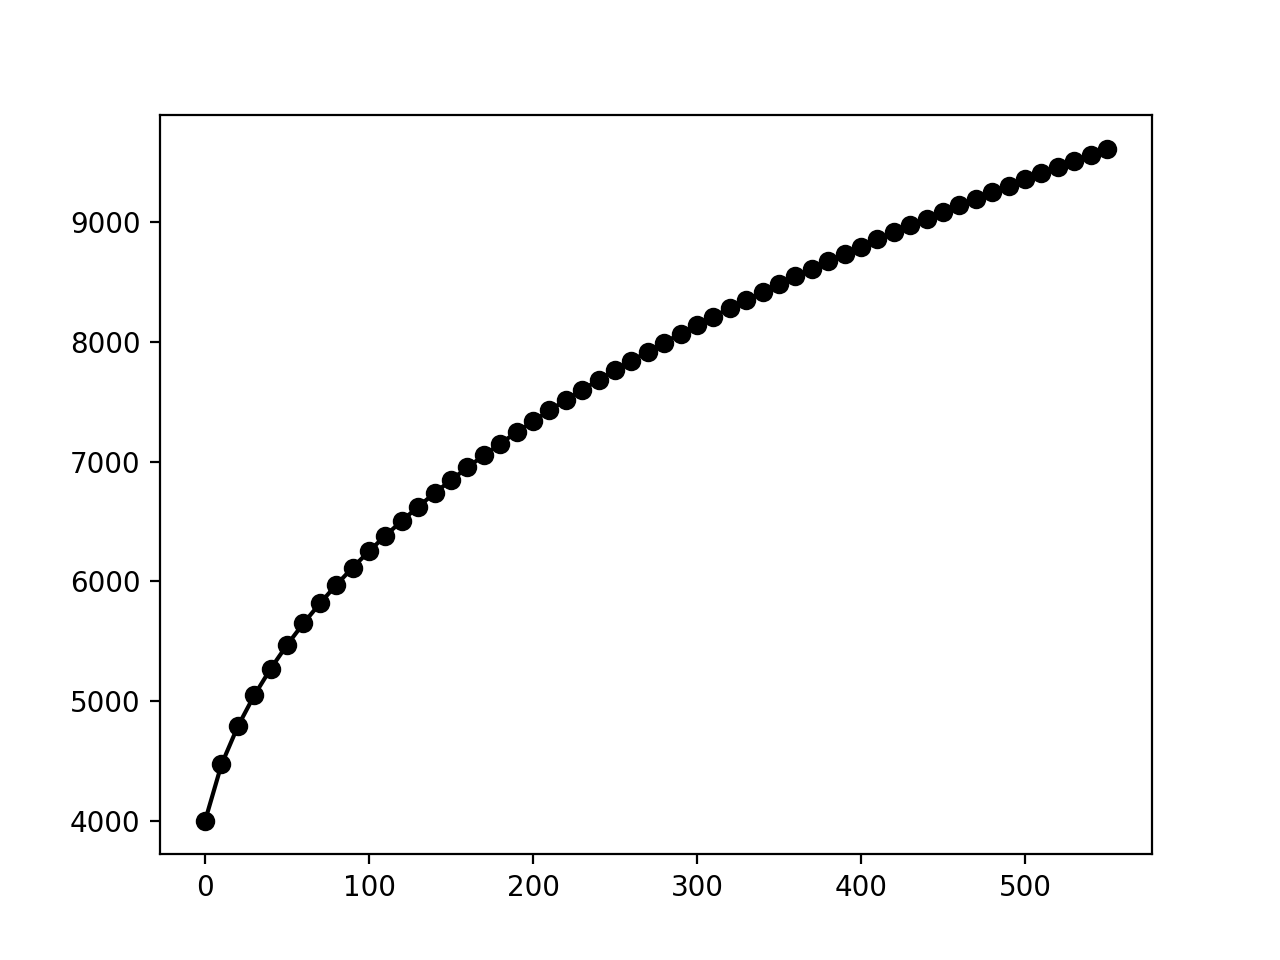

<IPython.core.display.Javascript object>


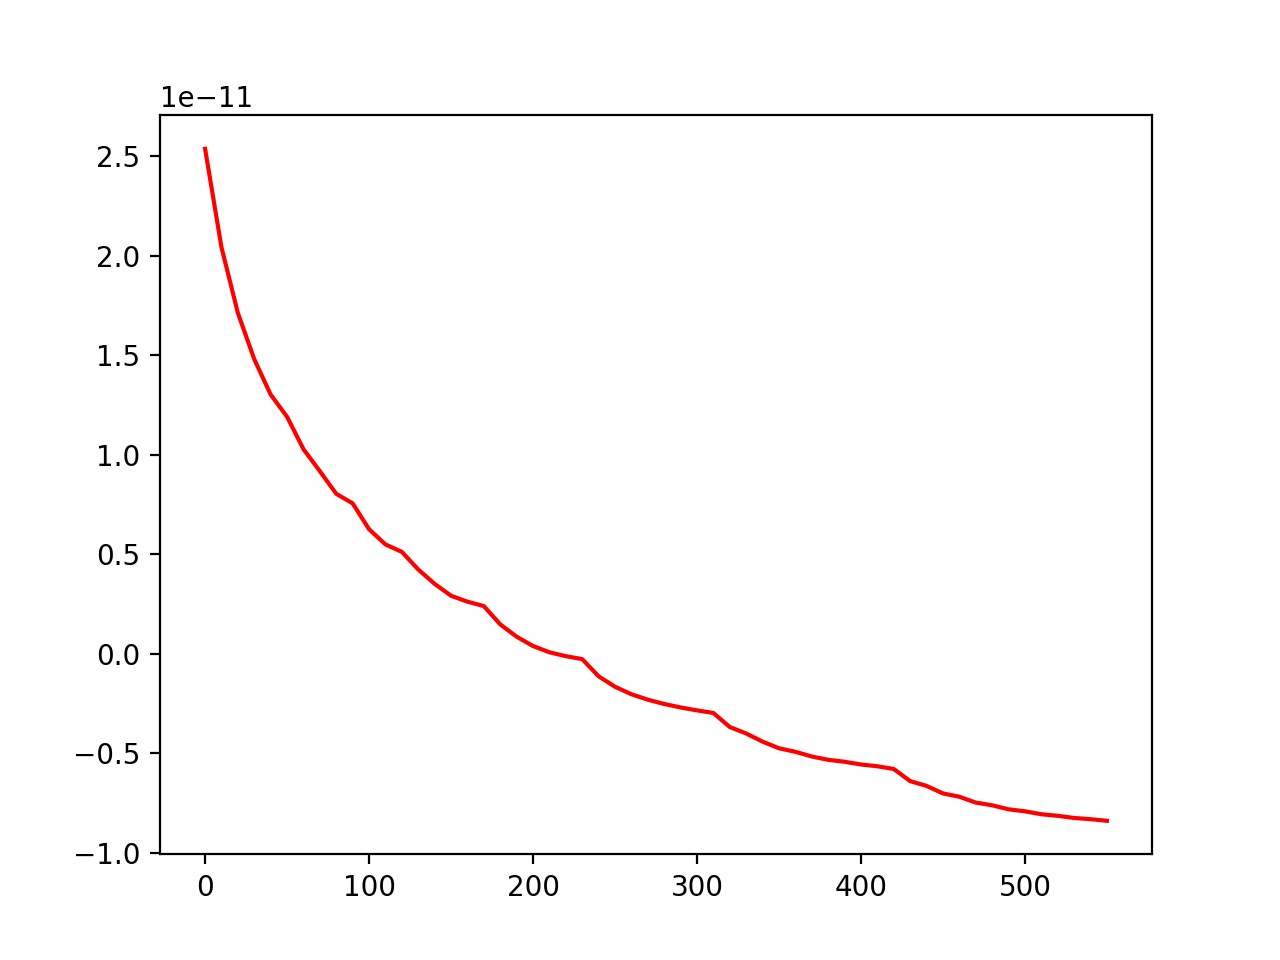

In [11]:
Pgrid = np.arange(0,550.1,10)
Vgrid, Tgrid = eos_mod.adiabatic_path(4000,Pgrid)
Sgrid = eos_mod.entropy(Vgrid, Tgrid)
plt.figure()
plt.plot(Pgrid, Tgrid, 'ko-')

plt.figure()
plt.plot(Pgrid,Sgrid-np.mean(Sgrid),'r-')

In [13]:
eos_mod.apply_electronic = False
Pgrid = np.arange(0,1.01e3,10)
Tfoot_grid = np.arange(1e3,4401,200)

#Tfoot_grid = np.arange(1e3,10.1e3,1000)
Vad_grid, Tad_grid = eos_mod.adiabatic_path_grid(Tfoot_grid,Pgrid)
props = eos_mod.material_properties(Vad_grid, Tad_grid)

In [12]:
props['gamma']

KeyError: 'gamma'

In [14]:
Vad_grid, Tad_grid = eos_mod.adiabatic_path_grid(Tfoot_grid,Pgrid)

Sad_grid = eos_mod.entropy(Vad_grid,Tad_grid)
Pad_grid = eos_mod.press(Vad_grid,Tad_grid)
Cv = eos_mod.heat_capacity(Vad_grid,Tad_grid)
alpha = eos_mod.thermal_exp(Vad_grid,Tad_grid)
gamma = eos_mod.gamma(Vad_grid, Tad_grid)
KT = eos_mod.bulk_mod(Vad_grid, Tad_grid)

Cp = Cv*(1+alpha*gamma*Tad_grid)
KS = KT*(1+alpha*gamma*Tad_grid)
dTdPs = gamma*Tad_grid/KS
rho = eos_mod.molar_mass/Vad_grid*CONSTS['ang3percc']/CONSTS['Nmol']

In [15]:

# Tfoot_grid = np.arange(2000,9001,1000)
# Tlbl = [2000,2250,2500,2750,3000,3250,3500]
Tlbl = [2000,3500]
delT = Tlbl[1]-Tlbl[0]
clims = [Tlbl[0]-delT/2,Tlbl[-1]+delT/2]
Tfoot_grid = Tlbl
Pgrid = np.arange(0,550.1,1)
eos_mod.apply_electronic = True
Vad_grid, Tad_grid = eos_mod.adiabatic_path_grid(Tfoot_grid, Pgrid)

# eos_mod_dK09.apply_electronic = True
# Vad_grid_dK09, Tad_grid_dK09 = eos_mod_dK09.adiabatic_path_grid(Tfoot_grid, Pgrid)

In [16]:
Vad_grid.shape

(2, 551)

In [17]:
Tad_grid.shape

(2, 551)

In [18]:
Pgrid.shape

(551,)

In [19]:
rho_grid = eos_mod.molar_mass/Vad_grid*CONSTS['ang3percc']/CONSTS['Nmol']
rho_grid.shape

(2, 551)

In [20]:
Tad_grid.shape

(2, 551)

<IPython.core.display.Javascript object>


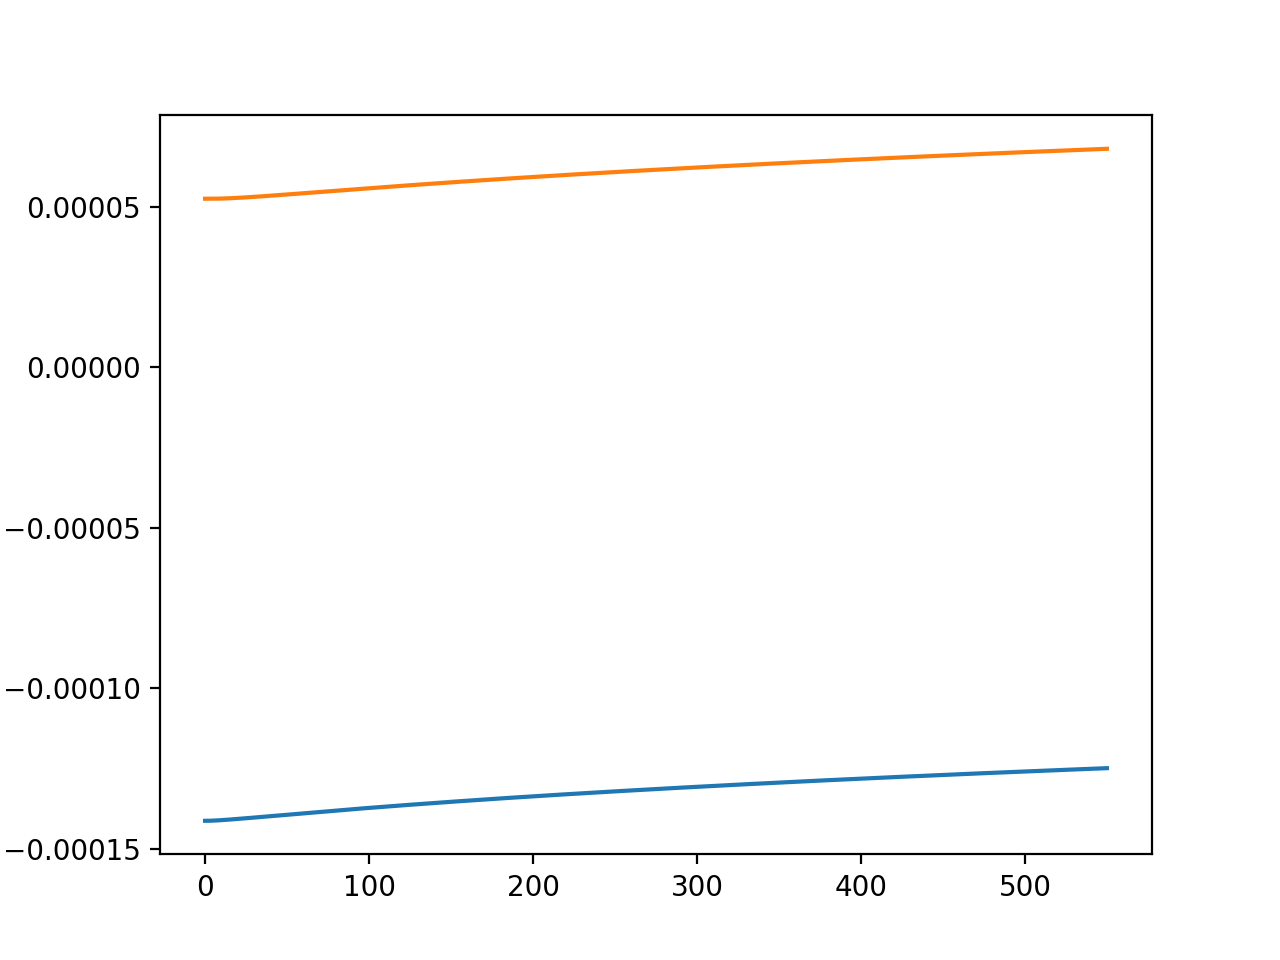

In [21]:
plt.figure()
plt.plot(eos_mod.entropy(Vad_grid.T,Tad_grid.T))

In [54]:
71-58

13

In [13]:
eos_mod.molar_mass/Vad_grid

array([[1.65403767, 1.7577439 , 1.82422216, ..., 4.32130001, 4.32325487,
        4.32520748],
       [1.62405432, 1.72459681, 1.79119986, ..., 4.30688332, 4.30884299,
        4.31080042],
       [1.59773661, 1.69472277, 1.76098718, ..., 4.29280324, 4.29476732,
        4.29672913],
       ...,
       [1.55066879, 1.64141225, 1.70654262, ..., 4.26559046, 4.26756235,
        4.26953195],
       [1.52810236, 1.61646862, 1.68110371, ..., 4.25226981, 4.25424525,
        4.25621839],
       [1.50521655, 1.59170383, 1.65601455, ..., 4.23889425, 4.2408731 ,
        4.24284965]])

In [ ]:
cmap = plt.get_cmap('coolwarm',len(Tlbl))
plot_adiabat_melting_curve(Tlbl, Pgrid, Tad_grid, Tad_grid_dK09, 
              Vad_grid, Vad_grid_dK09)

fig = plt.gcf()


ax_sub = fig.add_axes([.49,.36,.29,.2])
for Vad, Vad_dK09, Tad, Tad_dK09, iTpot in zip(
    Vad_grid, Vad_grid_dK09, Tad_grid, Tad_grid_dK09, Tlbl):
    icol = cmap((iTpot-clims[0])/(clims[1]-clims[0]))
    igamma_ad = eos_mod.gamma(Vad,Tad)
    igamma_ad_dK09 = eos_mod_dK09.gamma(Vad_dK09,Tad_dK09)
    ax_sub.plot(Pgrid,igamma_ad, '-', color=icol,lw=1)
    
ax_sub.set_ylim(0,1.25)
ax_sub.set_xlim(-5,135)
ax_sub.set_xlabel('P [GPa]')
ax_sub.set_ylabel(r'$\gamma$')
# plt.savefig('figs/adiabat-comparison.eps', dpi=450)